In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def load_obj(file_name):
    parts = {}
    with open(file_name, 'r+') as f:
        line = f.readline()
        curr_obj_name = None
        vertices = []
        curr_obj_vertices = set()
            
        while line:
            strs = line.rstrip().split(' ')
            if strs[0] == 'g':
                if curr_obj_name is not None:
                    parts[curr_obj_name] = np.array([vertices[i] for i in curr_obj_vertices])
                    curr_obj_vertices = set()
                curr_obj_name = strs[1]
            elif strs[0] == 'v':
                vertices.append([float(x) for x in strs[1:]])
            elif strs[0] == 'f':
                for fstr in strs[1:]:
                    curr_obj_vertices.add(int(fstr.split('/')[0]) - 1)
            line = f.readline()
        if curr_obj_name is not None:
            parts[curr_obj_name] = np.array([vertices[i] for i in curr_obj_vertices])
    return parts

def show(vertices):
    ax = plt.gca(projection='3d')
    ax.scatter(*zip(*vertices))
    plt.show()

def get_axis_stats(vertices):
    U, s, V_t = np.linalg.svd(vertices, full_matrices=False)
    projection = np.dot(vertices, V_t.T)
    return np.std(projection, axis=0)

def plot_histogram(dist):
    hist, bins = np.histogram(dist)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

In [42]:
parts = load_obj('LEGO_CAR_B1_small.obj')
centered_parts = { name : part - np.mean(part, axis=0, keepdims=True) for name, part in parts.items() }

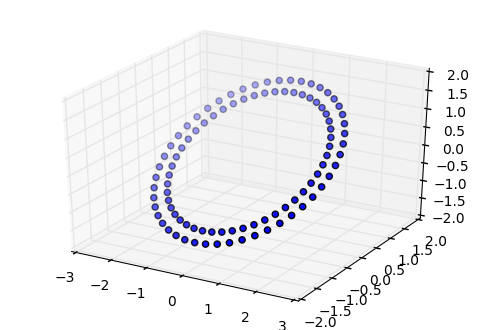

In [39]:
show(centered_parts['10_10'])

In [43]:
def sort_categories(centered_parts):
    stat_to_part = {}
    for label, vertices in centered_parts.items():
        axis_stat = get_axis_stats(vertices)
        for stat, stat_list in stat_to_part.items():
            if np.linalg.norm(np.subtract(stat, axis_stat)) < 1e-3:
                stat_list.append(label)
                break
        else:
            stat_to_part[tuple(axis_stat)] = [label]
    return stat_to_part
print(sort_categories(centered_parts))

{(1.4378218462590378, 1.4378217246629792, 1.0871583786856238e-06): ['10_10', '9_9'], (0.85320746154391691, 0.30629835724053606, 0.18918758378144829): ['6_6', '5_5', '7_7', '8_8'], (0.9954090873703092, 0.30629837007962551, 0.22071868354954058): ['1_1', '4_4', '3_3', '2_2']}
